In [288]:
import pandas as pd
import numpy as np
data=pd.read_csv("Amex/Code/train-with-new-features.csv")

In [298]:
pd.set_option('display.max_columns',0)
pd.set_option('display.max_colwidth',0)

In [299]:
data.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'sixes_ratio_last15',
       'ratio_sum_boundary_last5', 'ratio_avg_sr_last5', 'ecorat_15',
       'brps_team1', 'brps_team2', 'ratio_brps', 'team_winp_last6',
       'team_count_30runs_last15', 'batting_score_team1',
       'batting_score_team2', 'ratio_batting_score', 'bowling_score_team1',
       'bowling_score_team2', 'ratio_bowling_score', 'strength_team1-2',
       'team_ratio_ground_win', 'team1_win_score', 'team2_win_score',
       'win_score', 'team1_ground_win_score', 'team2_ground_win_score',
       'ratio_ground_win', 'winner_01', 'team1_lighting_win_score',
       'team2_lighting_w

[['ratio_brps','bowlingunit_1',
       'team_winp_last6', 'team_count_50runs_last15','ratio_batting_score','ratio_bowling_score','team_ratio_ground_win',
                 'strength_team1-2','ratio_avg_sr_last5','bowling_score_team1']]

In [300]:
train_data_1=data
#converting to toss winner id
for i in range(len(train_data_1)):
    if train_data_1['toss winner'].iloc[i] == train_data_1['team1'].iloc[i]:
        train_data_1.loc[i, 'toss_winner_id'] = 1
    else:
        train_data_1.loc[i, 'toss_winner_id'] = 0

train_data_1.head()

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,sixes_ratio_last15,ratio_sum_boundary_last5,ratio_avg_sr_last5,ecorat_15,brps_team1,brps_team2,ratio_brps,team_winp_last6,team_count_30runs_last15,batting_score_team1,batting_score_team2,ratio_batting_score,bowling_score_team1,bowling_score_team2,ratio_bowling_score,strength_team1-2,team_ratio_ground_win,team1_win_score,team2_win_score,win_score,team1_ground_win_score,team2_ground_win_score,ratio_ground_win,winner_01,team1_lighting_win_score,team2_lighting_win_score,ratio_lighting_win,team1_inning_win_score,team2_inning_win_score,ratio_inning_win,adv_score,team1_ground_score,team2_ground_score,ratio_ground_score,team2_bowl_hoh,team2_field_hoh,team1_bowl_hoh,team1_field_hoh,bowlingunit_1,bowlingunit_2,bowlingunitratio,toss_winner_id,team1_win
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,0,Hr Ct Sm Ie,Indore,20-10-2022,2,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571,1.090909,1.467742,1.805085,3.000000,5202.300183,3178.483454,1.636524,0.673137,0.777778,70.690833,62.639000,1.126524,1.103144,0.535834,1.369383,16.419798,0.508600,285,368,0.775068,0.2,0.2,1.000000,1,0.0,0.2,0.833333,0.8,0.4,1.285714,3.119048,53.0,28.8,1.812081,0,0,0,0,174,74,2.333333,0.0,0
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,0,Kn Ol Bn Bs,Bridgetown,23-01-2022,2,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000,0.766667,0.871383,0.958991,0.850000,15784.288760,17468.563180,0.903588,2.886248,1.000000,131.802625,162.907611,0.810229,1.574009,1.390714,1.076670,-8.128589,1.966182,463,99,4.640000,0.0,0.2,0.833333,0,0.0,0.2,0.833333,0.6,1.0,0.800000,2.466667,20.6,20.8,0.990826,10,7,1,0,170,182,0.934426,0.0,1
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:3681957.0:7671313.0:5320118.0:2922611.0:7184232.0:7661996.0:6240632.0,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:5516720.0:7328110.0:125915.0:130437.0:7507303.0:4420828.0:5652828.0,We,10576,Ne,0,Tt Be Nm,Nottingham,02-06-2023,2,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,154.333333,0.787234,0.902098,0.902711,1.218750,15757.396560,16901.886510,0.932290,0.673137,0.866667,144.226000,209.675500,0.689335,0.698682,0.869999,0.908386,-46.361940,0.754386,189,136,1.386861,0.0,1.0,0.500000,0,0.6,1.0,0.800000,1.0,1.0,1.000000,2.300000,17.2,150.8,0.119895,0,0,0,0,109,53,2.037037,0.0,1
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:4690188.0:4739580.0:4739552.0:5744850.0:2294823.0:9266102.0:284339.0,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:5742470.0:2740408.0:3575774.0:3200756.0:334963.0:6399210.0:6347494.0,Ga An Ws,36084,Ga An Ws,1,Bn La Sm Ta Td,Tarouba,10-09-2023,1,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000,1.444444,1.347826,1.088957,0.787234,21452.344990,17421.296840,1.231373,2.456452,2.125000,211.655000,113.142500,1.863066,0.336507,1.245285,0.595251,9.308224,2.449442,770,415,1.853365,0.0,0.2,0.833333,0,1.0,1.0,1.000000,1.0,1.0,1.000000,2.833333,21.4,16.2,1.302326,0,0,0,0,13,33,0.411765,1.0,1
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082.0:4640824.0:5038046.0:8180500.0:2035102.0:3851518.0:7881845.0:7453697.0,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:2252452.0:2966879.0:5554254.0:4690230.0:3373285.0:3759846.0:6496482.0,Gt Ts,48341,Gt Ts,0,Pb Ct An IS 

# 1 for toss decision Bat 0 for Field

In [301]:
for i in range(len(train_data_1)):
    if train_data_1['toss decision'].iloc[i] == 'bat':
        train_data_1.loc[i, 'toss decision'] = 1
    else:
        train_data_1.loc[i, 'toss decision'] = 0

In [302]:
train_data_1['lighting'].value_counts()

lighting
0    399
1    306
2    243
Name: count, dtype: int64

In [303]:
for i in range(len(train_data_1)):
    if train_data_1['lighting'].iloc[i] == 'night match':
        train_data_1.loc[i, 'lighting'] = 0
    elif train_data_1['lighting'].iloc[i] == 'day match':
        train_data_1.loc[i, 'lighting'] = 1
    else:
        train_data_1.loc[i, 'lighting'] = 2

# Label encoding categorical features

In [304]:
# Create binary target variable: 1 if team1 won, 0 otherwise
train_data_1.loc[:, 'team1_win'] = (train_data_1['team1_id'] == train_data_1['winner_id']).astype(int)


columns=['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'sixes_ratio_last15',
       'ratio_sum_boundary_last5', 'ratio_avg_sr_last5', 'ecorat_15',
       'brps_team1', 'brps_team2', 'ratio_brps', 'team_winp_last6',
       'team_count_30runs_last15', 'batting_score_team1',
       'batting_score_team2', 'ratio_batting_score', 'bowling_score_team1',
       'bowling_score_team2', 'ratio_bowling_score', 'strength_team1-2',
       'team_ratio_ground_win', 'team1_win_score', 'team2_win_score',
       'win_score', 'team1_ground_win_score', 'team2_ground_win_score',
       'ratio_ground_win', 'winner_01', 'team1_lighting_win_score',
       'team2_lighting_win_score', 'ratio_lighting_win',
       'team1_inning_win_score', 'team2_inning_win_score', 'ratio_inning_win',
       'adv_score', 'team1_ground_score', 'team2_ground_score',
       'ratio_ground_score', 'team2_bowl_hoh', 'team2_field_hoh',
       'team1_bowl_hoh', 'team1_field_hoh', 'bowlingunit_1', 'bowlingunit_2',
       'bowlingunitratio']
# Define features and target
X = train_data_1[columns]

y = train_data_1['team1_win']

numeric_col=[]
categorical_col=[]

numeric_col = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_col = X.select_dtypes(exclude=['float64', 'int64']).columns.tolist()


# List of categorical features

for col in ['match id', 'toss decision', 'toss_winner_id','lighting']:
    if col in numeric_col:
        numeric_col.remove(col)
        
categorical_col.extend([ 'toss decision', 'toss_winner_id','lighting'])


# Apply label encoding to categorical features
from sklearn.preprocessing import LabelEncoder

label_encoders = {col: LabelEncoder() for col in categorical_col}

for col in categorical_col:
    if col not in  ['toss_winner_id','toss decision','lighting']:
       X.loc[:, col] = label_encoders[col].fit_transform(X[col])

#X=pd.get_dummies(X,columns=one_hot_encode_columns)


In [305]:
X.head(3)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,sixes_ratio_last15,ratio_sum_boundary_last5,ratio_avg_sr_last5,ecorat_15,brps_team1,brps_team2,ratio_brps,team_winp_last6,team_count_30runs_last15,batting_score_team1,batting_score_team2,ratio_batting_score,bowling_score_team1,bowling_score_team2,ratio_bowling_score,strength_team1-2,team_ratio_ground_win,team1_win_score,team2_win_score,win_score,team1_ground_win_score,team2_ground_win_score,ratio_ground_win,winner_01,team1_lighting_win_score,team2_lighting_win_score,ratio_lighting_win,team1_inning_win_score,team2_inning_win_score,ratio_inning_win,adv_score,team1_ground_score,team2_ground_score,ratio_ground_score,team2_bowl_hoh,team2_field_hoh,team1_bowl_hoh,team1_field_hoh,bowlingunit_1,bowlingunit_2,bowlingunitratio
0,9331181,6,11283,931,43,12634,370,43,12634,44,0,44,55,322,2,58,2,7398,1.666667,0.672131,139.000000,100.0,157.178571,1.090909,1.467742,1.805085,3.00000,5202.300183,3178.483454,1.636524,0.673137,0.777778,70.690833,62.639000,1.126524,1.103144,0.535834,1.369383,16.419798,0.508600,285,368,0.775068,0.2,0.2,1.000000,1,0.0,0.2,0.833333,0.8,0.4,1.285714,3.119048,53.0,28.8,1.812081,0,0,0,0,174,74,2.333333
1,8797060,35,20,125,138,41,569,28,20,138,0,53,13,360,2,22,0,1406,1.285714,1.952381,156.000000,50.0,103.500000,0.766667,0.871383,0.958991,0.85000,15784.288760,17468.563180,0.903588,2.886248,1.000000,131.802625,162.907611,0.810229,1.574009,1.390714,1.076670,-8.128589,1.966182,463,99,4.640000,0.0,0.2,0.833333,0,0.0,0.2,0.833333,0.6,1.0,0.800000,2.466667,20.6,20.8,0.990826,10,7,1,0,170,182,0.934426
2,9433269,135,10576,357,81,8987,449,125,10576,81,0,111,83,26,2,79,3,251,0.857143,0.672131,173.266667,0.0,154.333333,0.787234,0.902098,0.902711,1.21875,15757.396560,16901.886510,0.932290,0.673137,0.866667,144.226000,209.675500,0.689335,0.698682,0.869999,0.908386,-46.361940,0.754386,189,136,1.386861,0.0,1.0,0.500000,0,0.6,1.0,0.800000,1.0,1.0,1.000000,2.300000,17.2,150.8,0.119895,0,0,0,0,109,53,2.037037


# Filling NaN with Iterative Imputer

In [307]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer

iterative_imputer=IterativeImputer()
knn_imputer=KNNImputer(n_neighbors=3)


def fill_NaN(method,X):
    if (method=="mean"):
        X_imputed=X.fillna(X.mean())
        return X_imputed
    elif(method=="Iterative"):
        X_imputed_array=iterative_imputer.fit_transform(X)
        X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns, index=X.index)
        return X_imputed
    else:
        X_imputed_array=knn_imputer.fit_transform(X)
        X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns, index=X.index)
        return X_imputed
 

method=".."
X_imputed=fill_NaN(method,X)

# Treating outliers 

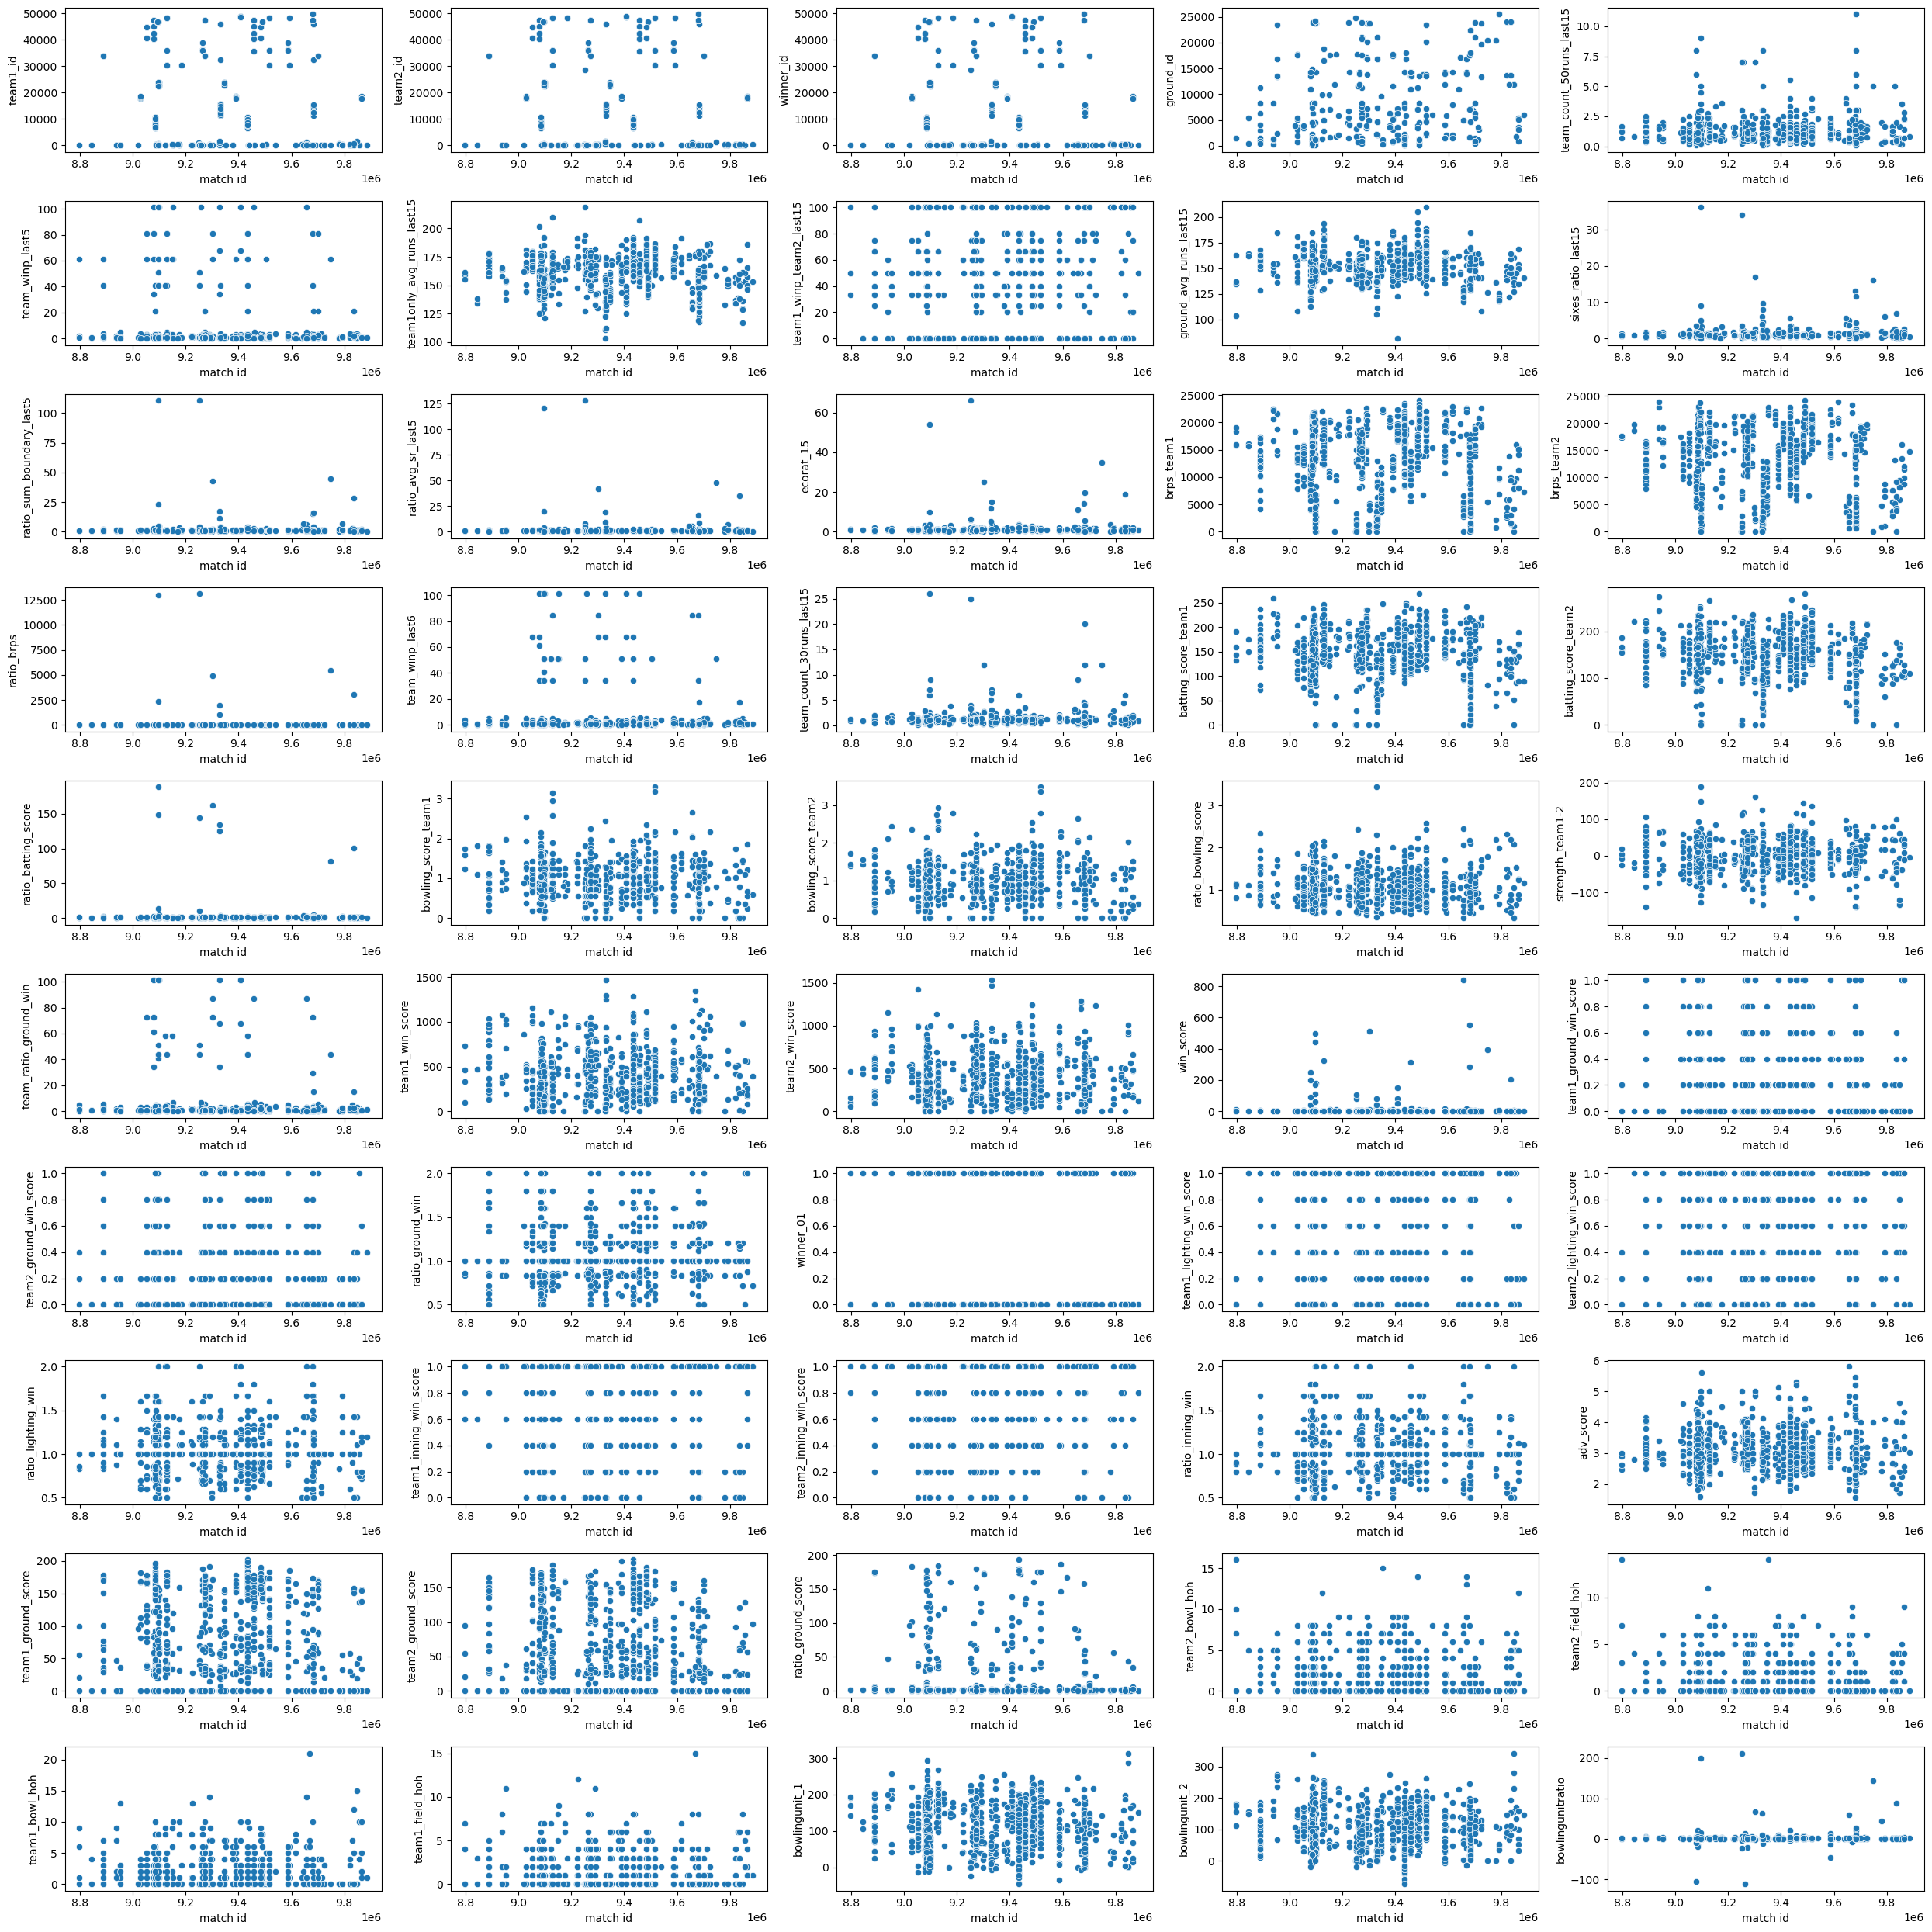

In [308]:
import matplotlib.pyplot as plt 
import seaborn as sns

rows=10
cols=5

fig,ax=plt.subplots(rows,cols,figsize=(25,25))
ax = ax.flatten()
for i,feature in enumerate(numeric_col):  
      sns.scatterplot(X_imputed,y=feature,x='match id',ax=ax[i])
        
plt.tight_layout()
plt.show()

# Applying Log Transformation or Imputation on outliers

In [309]:
iterative_imputer=IterativeImputer()

def impute_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #df_imputed_array=knn_imputer.fit_transform(df[feature])
        #df_imputed=pd.DataFrame(df_imputed_array)
        #median_value = df.median()
        df.loc[df[feature]>upper_bound,feature]=upper_bound
        df.loc[df[feature] < lower_bound,feature] = lower_bound
    return df
 
# Impute outliers in the specified features

data_imputed = impute_outliers(X_imputed, numeric_col)
X_imputed=data_imputed

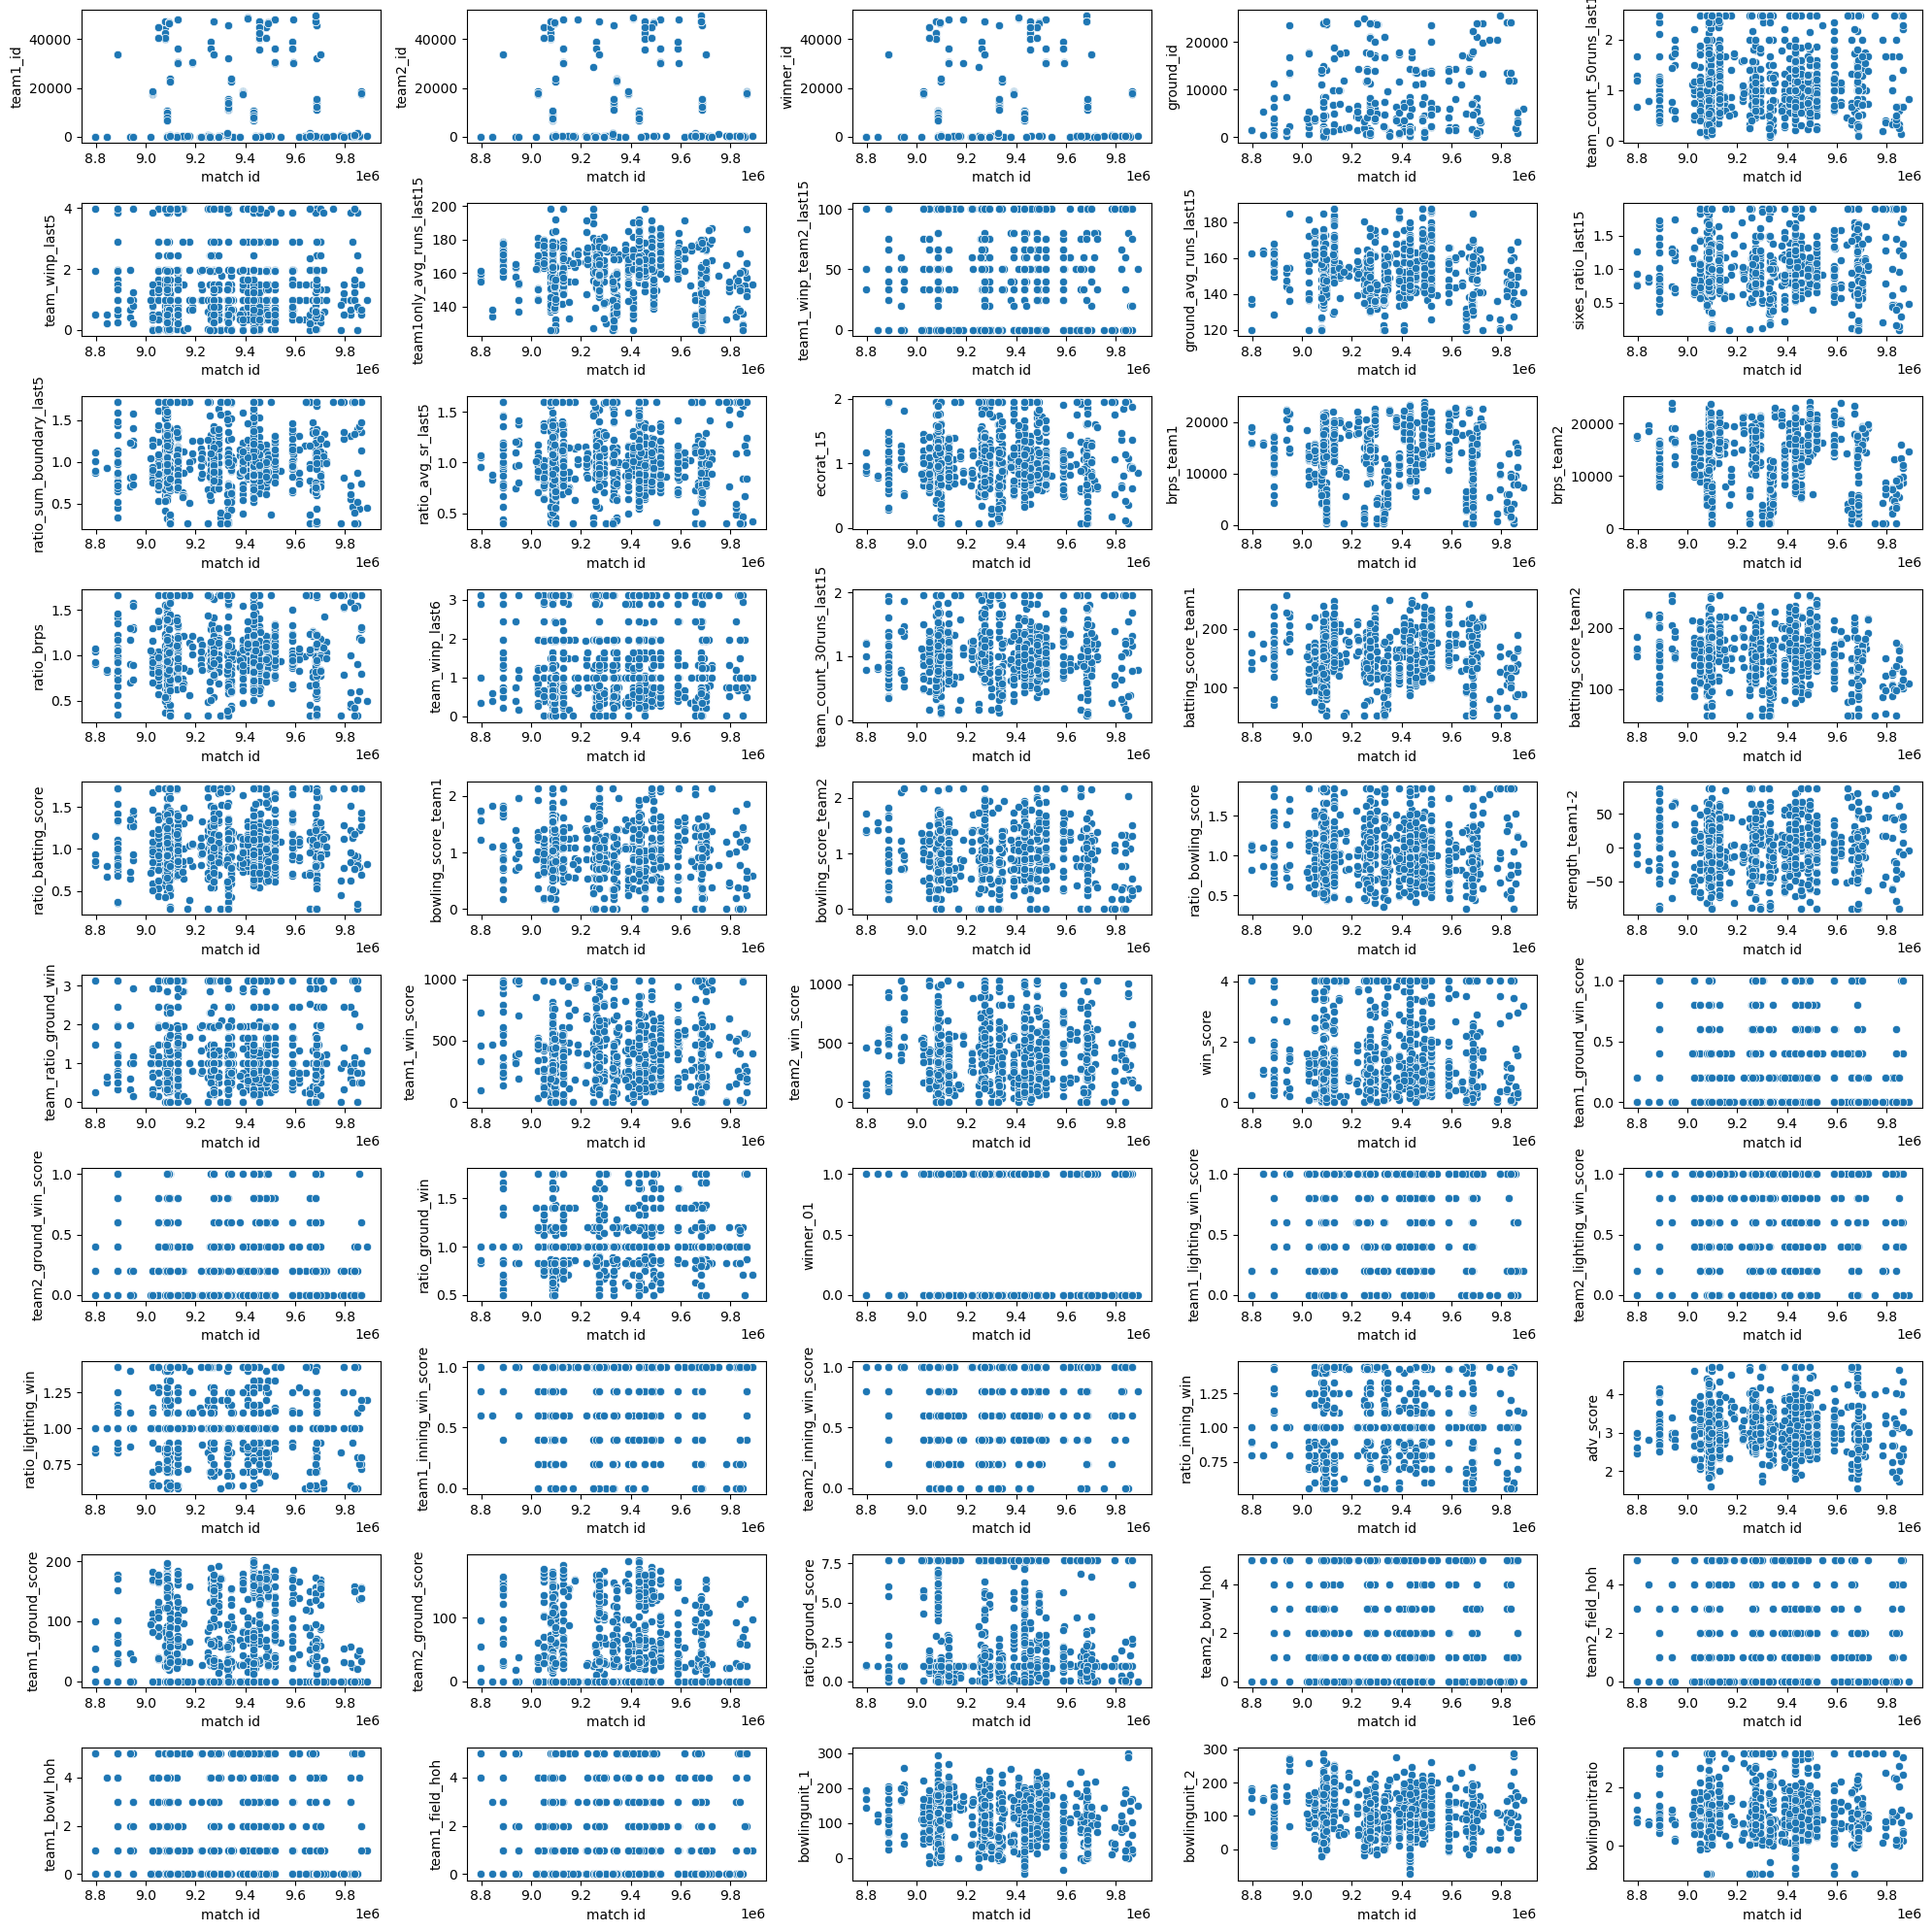

In [310]:
#log transformation

#for feature in features:
    #X_imputed[feature]=np.log(X_imputed[feature])
#X_imputed['match id']=X_imputed['match id'].astype('int64')

rows=10
cols=5

fig,ax=plt.subplots(rows,cols,figsize=(20,20))
ax = ax.flatten()
for i,feature in enumerate(numeric_col):
    sns.scatterplot(X_imputed,y=feature,x='match id',ax=ax[i])
    
plt.tight_layout()
plt.show()

In [311]:
data_imputed.shape

(948, 64)

In [312]:
data_imputed.head()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer

iterative_imputer=IterativeImputer()
knn_imputer=KNNImputer(n_neighbors=7)


def fill_NaN(method,X):
    numeric_cols = []
    for col in X.columns:
        try:
            X[col] = X[col].astype(float)
            numeric_cols.append(col)
        except ValueError:
            pass
    
    if (method=="mean"):
        X_imputed=X[numeric_cols].fillna(X.mean())
        return X_imputed
    elif(method=="Iterative"):
        X_imputed_array=iterative_imputer.fit_transform(X[numeric_cols])
        X_imputed = pd.DataFrame(X_imputed_array, columns=numeric_cols, index=X.index)
        return X_imputed
    else:
        X_imputed_array=knn_imputer.fit_transform(X[numeric_cols])
        X_imputed = pd.DataFrame(X_imputed_array, columns=numeric_cols, index=X.index)
        return X_imputed
 

method=".."
#X=data[numeric_features]
data_imputed=fill_NaN(method,X_imputed)
#X_imputed=pd.concat([X['match id'],X_imputed],axis=1)

In [315]:
data_imputed=data_imputed.drop(columns=['team1','team2','winner','winner_id'])

# Standarising the values within each columns

In [316]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler(feature_range=(1, 10))
std_scaler=StandardScaler()


data_imputed_scaled = data_imputed.copy()

for col in data_imputed.columns:
    if col in numeric_col:
        data_imputed_scaled[col] = std_scaler.fit_transform(data_imputed[col].values.reshape(-1, 1))
        data_imputed_scaled[col]=data_imputed_scaled[col]

[['team1_id',
       'team2_id', 'ground_id', 'team1_winp_team2_last15',
        'team_count_30runs_last15', 'team_winp_last6','ratio_brps',
       'bowlingunitratio','ratio_avg_sr_last5','ratio_sum_boundary_last5']]

# TOP FEATURES OF ALL

['ecorat_15',
 'ratio_brps',
 'toss winner',
 'ratio_sum_boundary_last5',
 'bowlingunitratio',
 'ground_avg_runs_last15',
 'team2_roster_ids',
 'team_count_50runs_last15',
 'team1_roster_ids',
 'team_count_30runs_last15']

# Removing irrelevant columns here from X_imputed

In [318]:
data_imputed_scaled.columns

Index(['match id', 'team1_id', 'team1_roster_ids', 'team2_id',
       'team2_roster_ids', 'toss winner', 'toss decision', 'venue', 'city',
       'match_dt', 'lighting', 'series_name', 'season', 'ground_id',
       'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'sixes_ratio_last15',
       'ratio_sum_boundary_last5', 'ratio_avg_sr_last5', 'ecorat_15',
       'brps_team1', 'brps_team2', 'ratio_brps', 'team_winp_last6',
       'team_count_30runs_last15', 'batting_score_team1',
       'batting_score_team2', 'ratio_batting_score', 'bowling_score_team1',
       'bowling_score_team2', 'ratio_bowling_score', 'strength_team1-2',
       'team_ratio_ground_win', 'team1_win_score', 'team2_win_score',
       'win_score', 'team1_ground_win_score', 'team2_ground_win_score',
       'ratio_ground_win', 'winner_01', 'team1_lighting_win_score',
       'team2_lighting_win_score', 'ratio_lighting_win',
       '

In [322]:
features=[ 'toss winner',
       'toss decision','lighting'
    , 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'sixes_ratio_last15',
       'ratio_sum_boundary_last5', 'ratio_avg_sr_last5', 'ecorat_15',
       'brps_team1', 'brps_team2', 'ratio_brps', 'team_winp_last6',
       'team_count_30runs_last15', 'batting_score_team1',
       'batting_score_team2', 'ratio_batting_score', 'bowling_score_team1',
       'bowling_score_team2', 'ratio_bowling_score', 'strength_team1-2',
       'team_ratio_ground_win', 'team1_win_score', 'team2_win_score',
       'win_score', 'team1_ground_win_score', 'team2_ground_win_score',
       'ratio_ground_win', 'team1_lighting_win_score',
       'team2_lighting_win_score', 'ratio_lighting_win',
       'team1_inning_win_score', 'team2_inning_win_score', 'ratio_inning_win',
       'adv_score', 'team1_ground_score', 'team2_ground_score',
       'ratio_ground_score', 'team2_bowl_hoh', 'team2_field_hoh',
       'team1_bowl_hoh', 'team1_field_hoh', 'bowlingunit_1', 'bowlingunit_2',
       'bowlingunitratio']

data_imputed_scaled1=data_imputed_scaled[features]

In [323]:
data_imputed_scaled1.head()

,toss winner,toss decision,lighting,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,sixes_ratio_last15,ratio_sum_boundary_last5,ratio_avg_sr_last5,ecorat_15,brps_team1,brps_team2,ratio_brps,team_winp_last6,team_count_30runs_last15,batting_score_team1,batting_score_team2,ratio_batting_score,bowling_score_team1,bowling_score_team2,ratio_bowling_score,strength_team1-2,team_ratio_ground_win,team1_win_score,team2_win_score,win_score,team1_ground_win_score,team2_ground_win_score,ratio_ground_win,team1_lighting_win_score,team2_lighting_win_score,ratio_lighting_win,team1_inning_win_score,team2_inning_win_score,ratio_inning_win,adv_score,team1_ground_score,team2_ground_score,ratio_ground_score,team2_bowl_hoh,team2_field_hoh,team1_bowl_hoh,team1_field_hoh,bowlingunit_1,bowlingunit_2,bowlingunitratio
0,44.0,0.0,2.0,0.983341,-0.626184,-1.598630,1.555768,0.269700,0.171641,1.391174,2.070691,2.126582,-1.557336,-2.009509,1.993083,-0.672892,-0.639467,-1.948411,-2.235768,0.336938,0.277579,-0.936230,0.998378,0.480892,-0.879504,-0.390191,-0.034327,-0.544812,-0.230744,-0.204647,-0.157327,-1.644449,-1.203227,-0.855076,0.263071,-0.900999,1.244164,0.009543,-0.220759,-0.507682,-0.195252,-0.805549,-0.717267,-0.826025,-0.738555,1.058832,-0.510537,1.217977
1,138.0,0.0,2.0,0.323141,0.562062,-0.391601,0.237509,-2.532507,-0.662143,-0.436111,-0.183747,-0.460668,0.319070,0.635635,-0.356590,1.835978,-0.096832,-0.484209,0.247439,-0.696617,1.246643,0.833494,0.120424,-0.181414,0.888564,0.327210,-1.153087,2.180861,-0.798914,-0.204647,-0.638420,-1.644449,-1.203227,-0.855076,-0.308927,0.879711,-0.993631,-1.046898,-0.718504,-0.644888,-0.497462,2.136132,2.612650,-0.242948,-0.738555,0.995234,1.231431,-0.241729
2,81.0,0.0,2.0,-0.419585,-0.626184,0.834361,-1.080750,0.054838,-0.609255,-0.341997,-0.382672,0.405792,0.314301,0.530742,-0.264575,-0.672892,-0.422413,-0.186552,1.405672,-1.091659,-0.554825,-0.244460,-0.384318,-1.212935,-0.581362,-0.777104,-0.999205,-0.028776,-0.798914,2.091276,-1.600606,-0.100437,0.937851,-1.020251,0.835068,0.879711,-0.072186,-1.316792,-0.770736,1.584702,-0.817953,-0.805549,-0.717267,-0.826025,-0.738555,0.025375,-0.849253,0.908803
3,34.0,0.0,2.0,1.849853,0.583621,0.195346,0.237509,-0.706619,1.080752,1.023744,0.275632,-0.608151,1.324134,0.626886,0.694235,1.348745,2.243282,1.429007,-0.985021,2.289687,-1.300199,0.532435,-1.323527,0.289025,1.474765,1.564526,0.161144,0.364712,-0.798914,-0.204647,-0.638420,0.928905,0.937851,-0.029199,0.835068,0.879711,-0.072186,-0.453132,-0.706214,-0.723781,-0.382835,-0.805549,-0.717267,-0.826025,-0.738555,-1.500960,-1.171839,-0.787107
4,40.0,0.0,2.0,-0.487105,-0.017571,0.223747,-1.080750,2.544617,0.922694,0.755478,1.078041,0.381316,1.219289,0.276676,1.053093,-0.302347,-0.259623,-0.189487,0.786750,-0.790646,0.629391,-0.179323,0.478241,-0.106198,-0.283428,0.246603,0.681014,-0.506320,-0.230744,-0.778628,0.419985,0.928905,0.937851,-0.029199,0.835068,0.879711,-0.072186,0.140634,-0.448124,-1.001622,1.969773,-0.805549,-0.717267,-0.826025,-0.738555,1.408617,1.360466,-0.140527


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


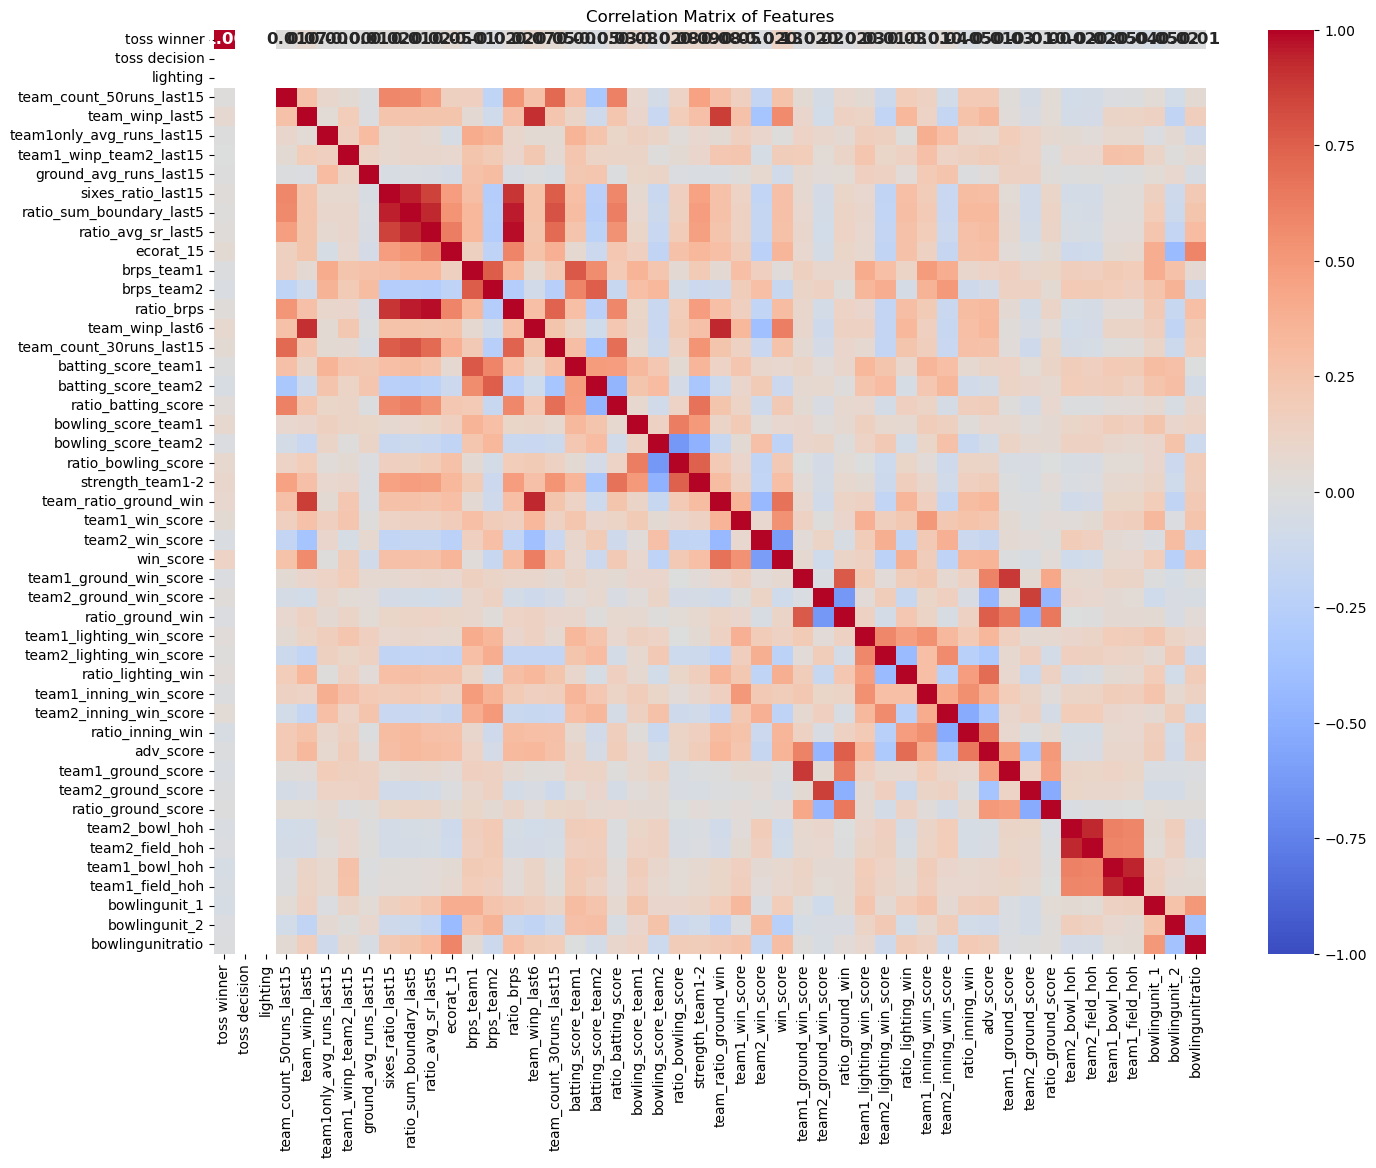

In [324]:
corr_matrix=data_imputed_scaled1.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 12, "weight": "bold"})
plt.title('Correlation Matrix of Features')
plt.show()

In [335]:
X=data_imputed_scaled1.drop(columns=['toss winner'])

In [336]:
X.head()

,toss decision,lighting,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,sixes_ratio_last15,ratio_sum_boundary_last5,ratio_avg_sr_last5,ecorat_15,brps_team1,brps_team2,ratio_brps,team_winp_last6,team_count_30runs_last15,batting_score_team1,batting_score_team2,ratio_batting_score,bowling_score_team1,bowling_score_team2,ratio_bowling_score,strength_team1-2,team_ratio_ground_win,team1_win_score,team2_win_score,win_score,team1_ground_win_score,team2_ground_win_score,ratio_ground_win,team1_lighting_win_score,team2_lighting_win_score,ratio_lighting_win,team1_inning_win_score,team2_inning_win_score,ratio_inning_win,adv_score,team1_ground_score,team2_ground_score,ratio_ground_score,team2_bowl_hoh,team2_field_hoh,team1_bowl_hoh,team1_field_hoh,bowlingunit_1,bowlingunit_2,bowlingunitratio
0,0.0,2.0,0.983341,-0.626184,-1.598630,1.555768,0.269700,0.171641,1.391174,2.070691,2.126582,-1.557336,-2.009509,1.993083,-0.672892,-0.639467,-1.948411,-2.235768,0.336938,0.277579,-0.936230,0.998378,0.480892,-0.879504,-0.390191,-0.034327,-0.544812,-0.230744,-0.204647,-0.157327,-1.644449,-1.203227,-0.855076,0.263071,-0.900999,1.244164,0.009543,-0.220759,-0.507682,-0.195252,-0.805549,-0.717267,-0.826025,-0.738555,1.058832,-0.510537,1.217977
1,0.0,2.0,0.323141,0.562062,-0.391601,0.237509,-2.532507,-0.662143,-0.436111,-0.183747,-0.460668,0.319070,0.635635,-0.356590,1.835978,-0.096832,-0.484209,0.247439,-0.696617,1.246643,0.833494,0.120424,-0.181414,0.888564,0.327210,-1.153087,2.180861,-0.798914,-0.204647,-0.638420,-1.644449,-1.203227,-0.855076,-0.308927,0.879711,-0.993631,-1.046898,-0.718504,-0.644888,-0.497462,2.136132,2.612650,-0.242948,-0.738555,0.995234,1.231431,-0.241729
2,0.0,2.0,-0.419585,-0.626184,0.834361,-1.080750,0.054838,-0.609255,-0.341997,-0.382672,0.405792,0.314301,0.530742,-0.264575,-0.672892,-0.422413,-0.186552,1.405672,-1.091659,-0.554825,-0.244460,-0.384318,-1.212935,-0.581362,-0.777104,-0.999205,-0.028776,-0.798914,2.091276,-1.600606,-0.100437,0.937851,-1.020251,0.835068,0.879711,-0.072186,-1.316792,-0.770736,1.584702,-0.817953,-0.805549,-0.717267,-0.826025,-0.738555,0.025375,-0.849253,0.908803
3,0.0,2.0,1.849853,0.583621,0.195346,0.237509,-0.706619,1.080752,1.023744,0.275632,-0.608151,1.324134,0.626886,0.694235,1.348745,2.243282,1.429007,-0.985021,2.289687,-1.300199,0.532435,-1.323527,0.289025,1.474765,1.564526,0.161144,0.364712,-0.798914,-0.204647,-0.638420,0.928905,0.937851,-0.029199,0.835068,0.879711,-0.072186,-0.453132,-0.706214,-0.723781,-0.382835,-0.805549,-0.717267,-0.826025,-0.738555,-1.500960,-1.171839,-0.787107
4,0.0,2.0,-0.487105,-0.017571,0.223747,-1.080750,2.544617,0.922694,0.755478,1.078041,0.381316,1.219289,0.276676,1.053093,-0.302347,-0.259623,-0.189487,0.786750,-0.790646,0.629391,-0.179323,0.478241,-0.106198,-0.283428,0.246603,0.681014,-0.506320,-0.230744,-0.778628,0.419985,0.928905,0.937851,-0.029199,0.835068,0.879711,-0.072186,0.140634,-0.448124,-1.001622,1.969773,-0.805549,-0.717267,-0.826025,-0.738555,1.408617,1.360466,-0.140527


# Voting Classifier Ensemble 

In [337]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

# TO USE LATEST

In [255]:
xgb_param_grid = {
    'n_estimators': [10,50, 100, 200],
    'max_depth': [2,3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

lgbm_param_grid = {
    'n_estimators': [10,50, 100, 200],
    'max_depth': [2,3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 70]
}

gbm_param_grid = {
    'n_estimators': [10,50, 100, 200],
    'max_depth': [2,3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

catboost_param_grid = {
    'iterations': [10,100, 200, 300],
    'depth': [2,3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the base models
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf_lgbm = LGBMClassifier()
clf_gbm = GradientBoostingClassifier()
clf_catboost = CatBoostClassifier(verbose=0)

# Grid search for XGBClassifier
grid_xgb = GridSearchCV(estimator=clf_xgb, param_grid=xgb_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Grid search for LGBMClassifier
grid_lgbm = GridSearchCV(estimator=clf_lgbm, param_grid=lgbm_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_lgbm.fit(X_train, y_train)

# Grid search for GradientBoostingClassifier
grid_gbm = GridSearchCV(estimator=clf_gbm, param_grid=gbm_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_gbm.fit(X_train, y_train)

# Grid search for CatBoostClassifier
grid_catboost = GridSearchCV(estimator=clf_catboost, param_grid=catboost_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_catboost.fit(X_train, y_train)

# Best estimators from the grid search
clf_xgb = grid_xgb.best_estimator_
clf_lgbm = grid_lgbm.best_estimator_
clf_gbm = grid_gbm.best_estimator_
clf_catboost = grid_catboost.best_estimator_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 372, number of negative: 386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6893
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490765 -> initscore=-0.036944
[LightGBM] [Info] Start training from score -0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

KeyboardInterrupt: 

# MOULIK MODEL

In [338]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RFE for feature selection
rfe = RFE(estimator=clf_gbm, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['team1only_avg_runs_last15', 'ecorat_15', 'brps_team1',
       'team_count_30runs_last15', 'batting_score_team1',
       'ratio_batting_score', 'bowling_score_team1', 'ratio_bowling_score',
       'team2_win_score', 'bowlingunit_1'],
      dtype='object')


In [339]:
X.head()

,toss decision,lighting,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,sixes_ratio_last15,ratio_sum_boundary_last5,ratio_avg_sr_last5,ecorat_15,brps_team1,brps_team2,ratio_brps,team_winp_last6,team_count_30runs_last15,batting_score_team1,batting_score_team2,ratio_batting_score,bowling_score_team1,bowling_score_team2,ratio_bowling_score,strength_team1-2,team_ratio_ground_win,team1_win_score,team2_win_score,win_score,team1_ground_win_score,team2_ground_win_score,ratio_ground_win,team1_lighting_win_score,team2_lighting_win_score,ratio_lighting_win,team1_inning_win_score,team2_inning_win_score,ratio_inning_win,adv_score,team1_ground_score,team2_ground_score,ratio_ground_score,team2_bowl_hoh,team2_field_hoh,team1_bowl_hoh,team1_field_hoh,bowlingunit_1,bowlingunit_2,bowlingunitratio
0,0.0,2.0,0.983341,-0.626184,-1.598630,1.555768,0.269700,0.171641,1.391174,2.070691,2.126582,-1.557336,-2.009509,1.993083,-0.672892,-0.639467,-1.948411,-2.235768,0.336938,0.277579,-0.936230,0.998378,0.480892,-0.879504,-0.390191,-0.034327,-0.544812,-0.230744,-0.204647,-0.157327,-1.644449,-1.203227,-0.855076,0.263071,-0.900999,1.244164,0.009543,-0.220759,-0.507682,-0.195252,-0.805549,-0.717267,-0.826025,-0.738555,1.058832,-0.510537,1.217977
1,0.0,2.0,0.323141,0.562062,-0.391601,0.237509,-2.532507,-0.662143,-0.436111,-0.183747,-0.460668,0.319070,0.635635,-0.356590,1.835978,-0.096832,-0.484209,0.247439,-0.696617,1.246643,0.833494,0.120424,-0.181414,0.888564,0.327210,-1.153087,2.180861,-0.798914,-0.204647,-0.638420,-1.644449,-1.203227,-0.855076,-0.308927,0.879711,-0.993631,-1.046898,-0.718504,-0.644888,-0.497462,2.136132,2.612650,-0.242948,-0.738555,0.995234,1.231431,-0.241729
2,0.0,2.0,-0.419585,-0.626184,0.834361,-1.080750,0.054838,-0.609255,-0.341997,-0.382672,0.405792,0.314301,0.530742,-0.264575,-0.672892,-0.422413,-0.186552,1.405672,-1.091659,-0.554825,-0.244460,-0.384318,-1.212935,-0.581362,-0.777104,-0.999205,-0.028776,-0.798914,2.091276,-1.600606,-0.100437,0.937851,-1.020251,0.835068,0.879711,-0.072186,-1.316792,-0.770736,1.584702,-0.817953,-0.805549,-0.717267,-0.826025,-0.738555,0.025375,-0.849253,0.908803
3,0.0,2.0,1.849853,0.583621,0.195346,0.237509,-0.706619,1.080752,1.023744,0.275632,-0.608151,1.324134,0.626886,0.694235,1.348745,2.243282,1.429007,-0.985021,2.289687,-1.300199,0.532435,-1.323527,0.289025,1.474765,1.564526,0.161144,0.364712,-0.798914,-0.204647,-0.638420,0.928905,0.937851,-0.029199,0.835068,0.879711,-0.072186,-0.453132,-0.706214,-0.723781,-0.382835,-0.805549,-0.717267,-0.826025,-0.738555,-1.500960,-1.171839,-0.787107
4,0.0,2.0,-0.487105,-0.017571,0.223747,-1.080750,2.544617,0.922694,0.755478,1.078041,0.381316,1.219289,0.276676,1.053093,-0.302347,-0.259623,-0.189487,0.786750,-0.790646,0.629391,-0.179323,0.478241,-0.106198,-0.283428,0.246603,0.681014,-0.506320,-0.230744,-0.778628,0.419985,0.928905,0.937851,-0.029199,0.835068,0.879711,-0.072186,0.140634,-0.448124,-1.001622,1.969773,-0.805549,-0.717267,-0.826025,-0.738555,1.408617,1.360466,-0.140527


In [363]:
selected_features=['ratio_bowling_score',
 'bowlingunit_1',
 'bowling_score_team1',
 'ratio_brps',
 'adv_score',
 'strength_team1-2',
 'team1_lighting_win_score',
 'batting_score_team1',
 'team_winp_last6',
 'ratio_batting_score']
X=X[selected_features]

In [351]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Sample data creation for demonstration
# Assuming X and y are your feature matrix and target vector respectively
# X, y = <your_dataset>

# User-defined parameters
n_trees = 10
depth = 3
lr = 0.1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
lgbm_model = LGBMClassifier(n_estimators=n_trees, max_depth=depth, learning_rate=lr)
xgb_model = XGBClassifier(n_estimators=n_trees, max_depth=depth, learning_rate=lr)
catboost_model = CatBoostClassifier(n_estimators=n_trees, max_depth=depth, learning_rate=lr, verbose=0)
gbm_model = GradientBoostingClassifier(n_estimators=n_trees, max_depth=depth, learning_rate=lr)

# Initialize Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lgbm', lgbm_model),
    ('xgb', xgb_model),
    ('catboost', catboost_model),
    ('gbm', gbm_model)
], voting='soft')

# Train the ensemble model on the entire dataset
voting_clf.fit(X, y)

# Evaluate the ensemble model's performance on the testing set
print("Test Classification Report:")
print(classification_report(y_test, voting_clf.predict(X_test), labels=[0, 1]))

# Note: Feature importance is not directly available for Voting Classifier


[LightGBM] [Info] Number of positive: 471, number of negative: 477
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2014
[LightGBM] [Info] Number of data points in the train set: 948, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496835 -> initscore=-0.012658
[LightGBM] [Info] Start training from score -0.012658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.57      0.64        91
           1       0.67      0.80      0.73        99

    accuracy        

In [376]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier

# Assuming you have a voting classifier named 'voting_clf'
voting_clf = CalibratedClassifierCV(voting_clf, method='isotonic')
voting_clf.fit(X_train, y_train)

# Predict probabilities on the test set
probabilities = voting_clf.predict_proba(X_test)

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1508
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 297, number of negative: 309
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remo

(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'sixes_ratio_last15',
       'ratio_sum_boundary_last5', 'ratio_avg_sr_last5', 'ecorat_15',
       'brps_team1', 'brps_team2', 'ratio_brps', 'team_winp_last6',
       'team_count_30runs_last15', 'batting_score_team1',
       'batting_score_team2', 'ratio_batting_score', 'bowling_score_team1',
       'bowling_score_team2', 'ratio_bowling_score', 'strength_team1-2',
       'team_ratio_ground_win', 'team1_win_score', 'team2_win_score',
       'win_score', 'team1_ground_win_score', 'team2_ground_win_score',
       'ratio_ground_win', 'winner_01', 'team1_lighting_win_score',
       'team2_lighting_win_score', 'ratio_lighting_win',
       'team1_inning_win_score', 'team2_inning_win_score', 'ratio_inning_win',
       'adv_score', 'team1_ground_score', 'team2_ground_score',
       'ratio_ground_score', 'team2_bowl_hoh', 'team2_field_hoh',
       'team1_bowl_hoh', 'team1_field_hoh', 'bowlingunit_1', 'bowlingunit_2',
       'bowlingunitratio']

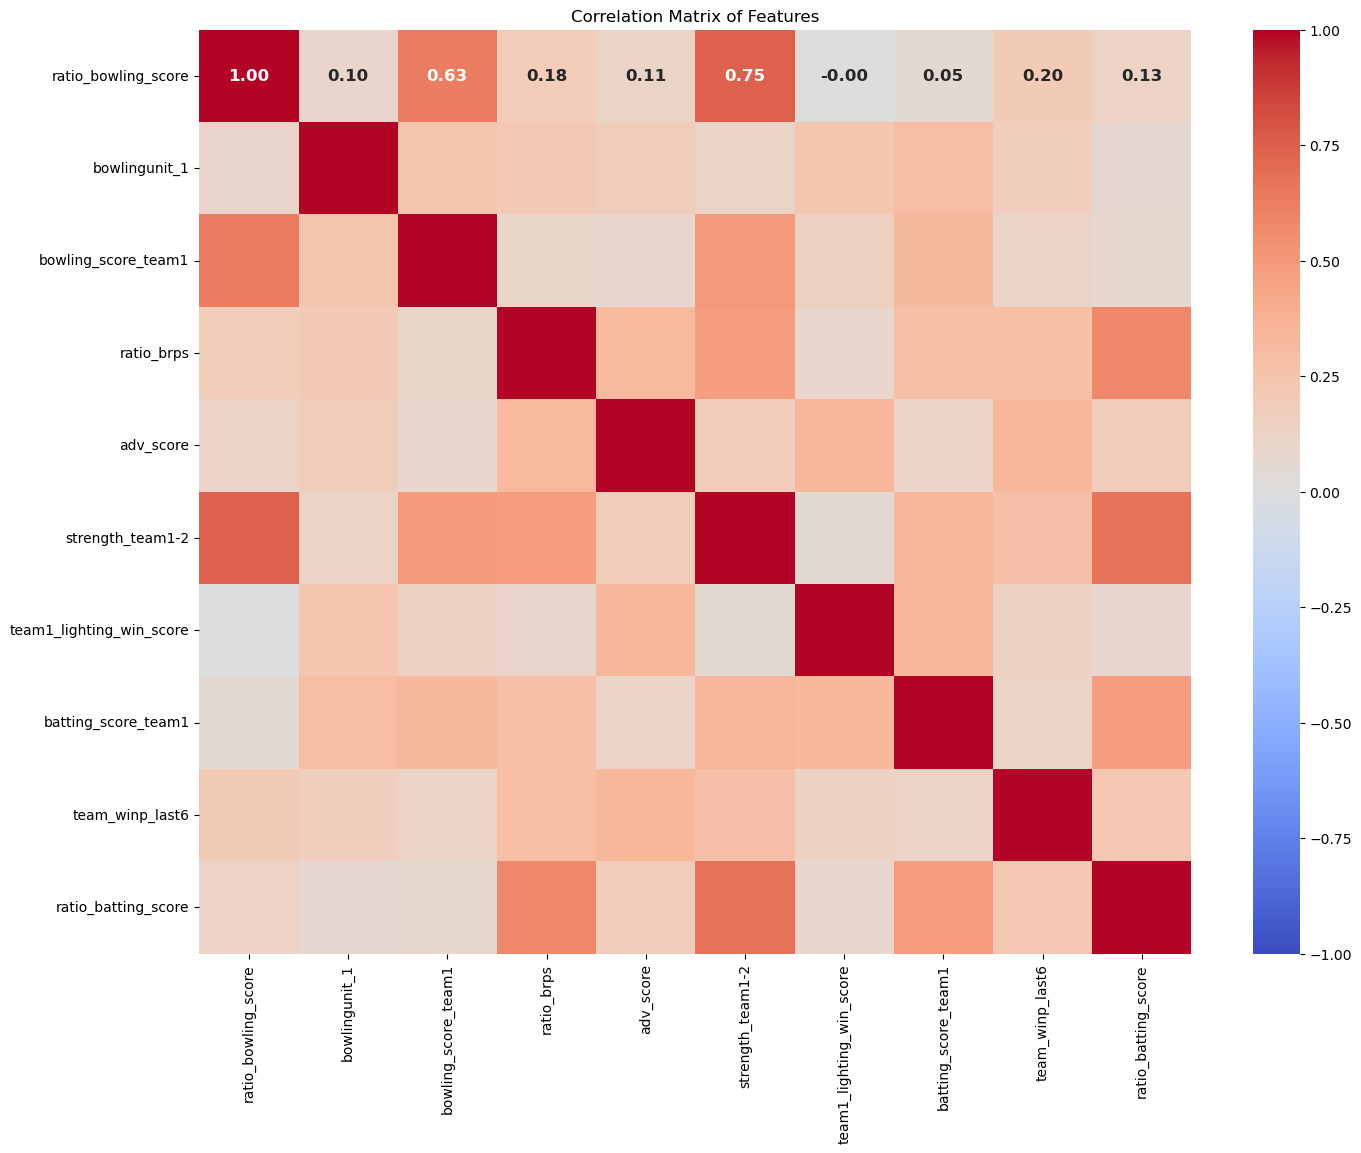

In [343]:
corr_matrix=X.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 12, "weight": "bold"})
plt.title('Correlation Matrix of Features')
plt.show()

# Feature importance

[LightGBM] [Info] Number of positive: 372, number of negative: 386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1909
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490765 -> initscore=-0.036944
[LightGBM] [Info] Start training from score -0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

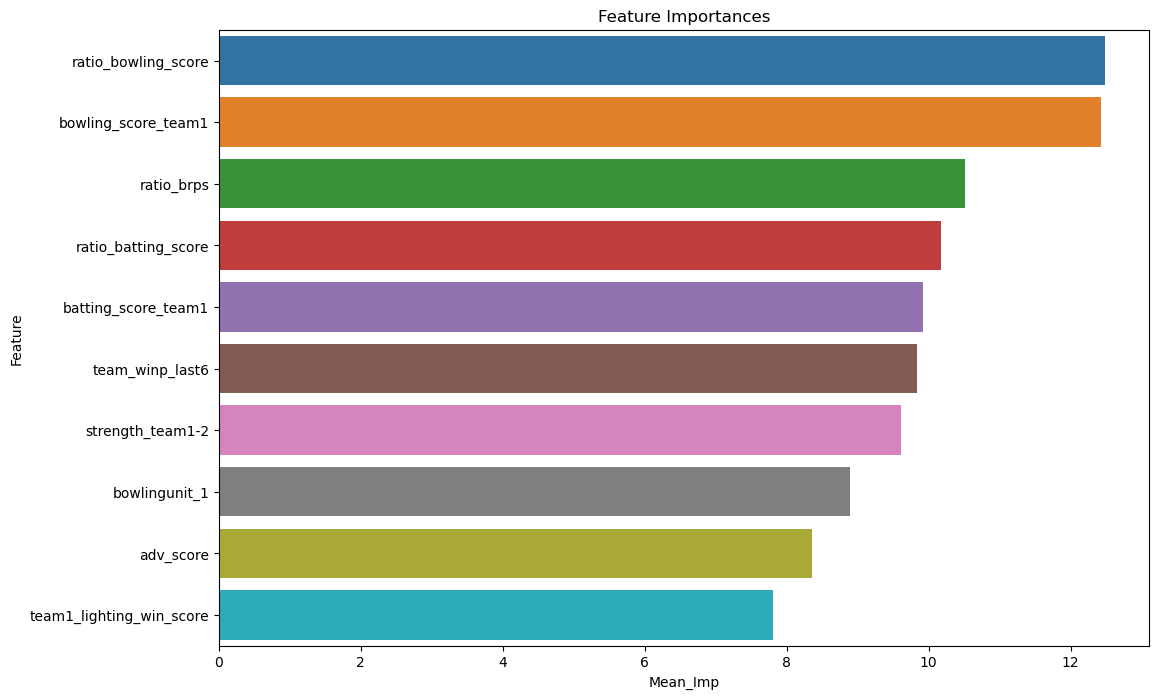

                    Feature        XGB  LGBM       GBM   CatBoost   Mean_Imp
0  ratio_bowling_score       12.478586  69    0.102412  9.547781   12.478586
2  bowling_score_team1       12.425106  116   0.150257  13.132821  12.425106
3  ratio_brps                10.509751  119   0.142096  12.441675  10.509751
9  ratio_batting_score       10.167300  103   0.107803  10.543227  10.167300
7  batting_score_team1       9.918692   95    0.114118  10.721911  9.918692 
8  team_winp_last6           9.841653   76    0.074211  9.245804   9.841653 
5  strength_team1-2          9.612191   95    0.099282  9.252047   9.612191 
1  bowlingunit_1             8.889114   96    0.090177  8.390610   8.889114 
4  adv_score                 8.352355   92    0.090917  9.801749   8.352355 
6  team1_lighting_win_score  7.805245   31    0.028728  6.922376   7.805245 


In [352]:
import pandas as pd

# Fit each model separately to get feature importances
clf_xgb.fit(X_train, y_train)
clf_lgbm.fit(X_train, y_train)
clf_gbm.fit(X_train, y_train)
clf_catboost.fit(X_train, y_train)

# Get feature importances
xgb_importances = clf_xgb.feature_importances_
lgbm_importances = clf_lgbm.feature_importances_
gbm_importances = clf_gbm.feature_importances_
catboost_importances = clf_catboost.feature_importances_

# Aggregate feature importances in a DataFrame
features = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'feature_{i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': features,
    'XGB': xgb_importances,
    'LGBM': lgbm_importances,
    'GBM': gbm_importances,
    'CatBoost': catboost_importances
})

# Average importance across models

importance_df['XGB']=importance_df['XGB']*100
#importance_df['GBM']=importance_df['GBM']*100


models_used=['XGB']

for i, row in importance_df.iterrows():
    mean=row[models_used].mean()
    importance_df.loc[i,'Mean_Imp']=mean

importance_df=importance_df.sort_values(by='Mean_Imp',ascending=False)
importance_df

plt.figure(figsize=(12, 8))
sns.barplot(x='Mean_Imp', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

# Display the top 10 features by importance
top_features = importance_df.head(10)
print(top_features)

In [ ]:
top_features['Feature'].to_list()

# STORING THE PREDICTIONS OF Test and Train

# Test data filling for submission Then Train below it

In [377]:
#train whole dataset

test=pd.read_csv("Amex/Code/test-with-new-features.csv")


X=test[selected_features]

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer

iterative_imputer=IterativeImputer()
knn_imputer=KNNImputer(n_neighbors=3)


def impute_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #df_imputed_array=knn_imputer.fit_transform(df[feature])
        #df_imputed=pd.DataFrame(df_imputed_array)
        median_value = df.median()
        df.loc[df[feature]>upper_bound,feature]=upper_bound
        df.loc[df[feature] < lower_bound,feature] = lower_bound
    return df

data_imputed = impute_outliers(X,selected_features)

X_imputed_array=knn_imputer.fit_transform(data_imputed)
data_imputed = pd.DataFrame(X_imputed_array, columns=selected_features, index=data_imputed.index)


from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler= StandardScaler()
minmax_scaler=MinMaxScaler(feature_range=(1, 10))

data_imputed_scaled = data_imputed.copy()


for col in data_imputed.columns:
    if col in numeric_col:
        data_imputed_scaled[col] = scaler.fit_transform(data_imputed[col].values.reshape(-1, 1))
        data_imputed_scaled[col]=data_imputed_scaled[col]



X=data_imputed_scaled
        
# Train accuracy
prediction=voting_clf.predict(X)
pred_prob=voting_clf.predict_proba(X)[:,1]

pred_score_test=pd.DataFrame({'win_pred_score':pred_prob})
prediction=pd.DataFrame({"prediction":prediction})
print(prediction)

#Making submission file
winner_id=[]
for i in range(len(prediction)):
    if (prediction["prediction"].iloc[i]==1):
        winner_id.append(test['team1_id'].iloc[i])
    else:
        winner_id.append(test['team2_id'].iloc[i])


winner_df=pd.DataFrame({'win_pred_team_id':winner_id})
winner_df=pd.concat([winner_df,pred_score_test],axis=1)
submission_test=pd.DataFrame()

for col in X.columns:
    values=X[col].to_list()
    col_dataframe=pd.DataFrame({col:values})
    submission_test=pd.concat([submission_test,col_dataframe],axis=1)
submission_test=pd.concat([winner_df,submission_test],axis=1)

#submission_test.to_csv("submission_test.csv",index=False)

     prediction
0    0         
1    1         
2    1         
3    0         
4    1         
..  ..         
266  0         
267  1         
268  1         
269  0         
270  0         

[271 rows x 1 columns]


C:\Users\dell\AppData\Local\Temp\ipykernel_14728\3690028191.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '286.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature]>upper_bound,feature]=upper_bound


In [378]:
X.head()

,ratio_bowling_score,bowlingunit_1,bowling_score_team1,ratio_brps,adv_score,strength_team1-2,team1_lighting_win_score,batting_score_team1,team_winp_last6,ratio_batting_score
0,-1.914762,-1.938538,-2.078189,-2.164516,-0.524003,-2.451551,-1.637832,-2.459042,-1.289052,-2.407285
1,0.340288,-0.859374,-0.417103,-0.207433,0.024217,0.643658,-0.618653,0.561544,-0.666184,0.198775
2,-1.692527,1.438200,0.139374,-0.311620,0.233537,-1.307137,0.910115,0.314937,-0.354656,-0.326859
3,-0.891670,0.707153,-0.854004,-0.424383,0.951206,-1.165167,0.910115,-0.202318,-0.043129,-0.627814
4,0.151924,0.759371,1.044119,1.031025,1.868227,0.588215,0.910115,1.321278,-0.824226,0.501793


## Train dataset prediction final pipeline code

In [379]:

#train whole dataset

train=pd.read_csv("Amex/Code/train-with-new-features.csv")

X = train[selected_features]

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

knn_imputer=KNNImputer(n_neighbors=3)


def impute_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #df_imputed_array=knn_imputer.fit_transform(df[feature])
        #df_imputed=pd.DataFrame(df_imputed_array)
        median_value = df.median()
        df.loc[df[feature]>upper_bound,feature]=upper_bound
        df.loc[df[feature] < lower_bound,feature] = lower_bound
    return df

data_imputed = impute_outliers(X,selected_features)

X_imputed_array=knn_imputer.fit_transform(data_imputed)
data_imputed = pd.DataFrame(X_imputed_array, columns=selected_features, index=data_imputed.index)


from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler= StandardScaler()
minmax_scaler=MinMaxScaler(feature_range=(1, 10))

data_imputed_scaled = data_imputed.copy()


for col in data_imputed.columns:
    if col in numeric_col:
        data_imputed_scaled[col] = scaler.fit_transform(data_imputed[col].values.reshape(-1, 1))
        data_imputed_scaled[col]=data_imputed_scaled[col]



X=data_imputed_scaled

prediction=voting_clf.predict(X)
pred_prob=voting_clf.predict_proba(X)[:,1]

pred_score_y=pd.DataFrame({'win_pred_score':pred_prob})
prediction=pd.DataFrame({"prediction":prediction})

#Making submission file
winner_id=[]
for i in range(len(prediction)):
    if (prediction['prediction'].iloc[i]==1):
        winner_id.append(train['team1_id'].iloc[i])
    else:
        winner_id.append(train['team2_id'].iloc[i])


winner_df=pd.DataFrame({'win_pred_team_id':winner_id})
winner_df=pd.concat([winner_df,pred_score_y],axis=1)
submission_train=pd.DataFrame()

for col in X.columns:
    values=X[col].to_list()
    col_dataframe=pd.DataFrame({col:values})
    submission_train=pd.concat([submission_train,col_dataframe],axis=1)
submission_train=pd.concat([winner_df,submission_train],axis=1)
#submission_train.to_csv("submission_train.csv",index=False)

# Concat both the dataframes train below test

In [380]:
submission=pd.concat([submission_test,submission_train],axis=0)
submission.to_csv("submission-file30ensemble4.csv",index=False)

# Final Code Pipeline

In [ ]:
train=pd.read_csv("Amex/Code/train-with-new-features.csv")

# Converting Toss Decision-Winner,Lighting in 0,1 

In [ ]:

for i in range(len(train)):
    if train['toss winner'].iloc[i] == train['team1'].iloc[i]:
        train.loc[i, 'toss_winner_id'] = 1
    else:
        train.loc[i, 'toss_winner_id'] = 0

for i in range(len(train)):
    if train['toss decision'].iloc[i] == 'bat':
        train.loc[i, 'toss decision'] = 1
    else:
        train.loc[i, 'toss decision'] = 0

for i in range(len(train)):
    if train['lighting'].iloc[i] == 'night match':
        train.loc[i, 'lighting'] = 0
    elif train['lighting'].iloc[i] == 'day match':
        train.loc[i, 'lighting'] = 1
    else:
        train.loc[i, 'lighting'] = 2

# Columns to use

In [ ]:
columns=['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'sixes_ratio_last15',
       'ratio_sum_boundary_last5', 'ratio_avg_sr_last5', 'ecorat_15',
       'brps_team1', 'brps_team2', 'ratio_brps', 'bowlingunitratio',
       'team_winp_last6', 'team_count_30runs_last15', 'batting_score_team1',
       'batting_score_team2', 'ratio_batting_score', 'bowling_score_team1',
       'bowling_score_team2', 'ratio_bowling_score', 'strength_team1-2',
       'team_ratio_ground_win', 'bowlingunit_1']

# Pre Processing

In [ ]:
X = train[columns]

numeric_col=[]
categorical_col=[]

numeric_col = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_col = X.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

for col in ['match id', 'toss decision', 'toss_winner_id','lighting']:
    if col in numeric_col:
        numeric_col.remove(col)
        
categorical_col.extend(['match id', 'toss decision', 'toss_winner_id','lighting'])


# Apply label encoding to categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {col: LabelEncoder() for col in categorical_col}

for col in categorical_col:
    if col not in ['toss_winner_id','toss decision','lighting']:
      X.loc[:, col] = label_encoders[col].fit_transform(X[col])

# Impute values in NaN 

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imputer=IterativeImputer()

X_imputed_array=iterative_imputer.fit_transform(X)
X_imputed= pd.DataFrame(X_imputed_array, columns=X.columns, index=X.index)

# Capping Outliers 

In [ ]:
def impute_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #df_imputed_array=knn_imputer.fit_transform(df[feature])
        #df_imputed=pd.DataFrame(df_imputed_array)
        median_value = df.median()
        df.loc[df[feature]>upper_bound,feature]=upper_bound
        df.loc[df[feature] < lower_bound,feature] = lower_bound
    return df

data_imputed = impute_outliers(X_imputed, numeric_col)
X_imputed=data_imputed

# Standarising Values-- MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler= StandardScaler()
minmax_scaler=MinMaxScaler(feature_range=(0, 10))

data_imputed_scaled = data_imputed.copy()
for col in data_imputed.columns:
    if col in numeric_col:
        data_imputed_scaled[col] = minmax_scaler.fit_transform(data_imputed[col].values.reshape(-1, 1))
        data_imputed_scaled[col]= data_imputed_scaled[col]

# Dropping columns not used for training/test

In [ ]:
X=data_imputed_scaled

drop_col=['match id']
X.drop(columns=drop_col,inplace=True)

top_features=['ratio_brps','bowlingunit_1',
       'team_winp_last6', 'team_count_30runs_last15','ratio_batting_score','ratio_bowling_score','team_ratio_ground_win',
                 'strength_team1-2','ratio_avg_sr_last5','bowling_score_team1']


for col in X.columns:
    if col not in top_features:
         X.drop(columns=col,inplace=True)

# Prediction and Score

In [ ]:
prediction=ensemble_model.predict(X)
pred_prob=ensemble_model.predict_proba(X)[:,1]

pred_score_y=pd.DataFrame({'win_pred_score':pred_prob})
prediction=pd.DataFrame({"prediction":prediction})

# Making submission file

In [ ]:
winner_id=[]
for i in range(len(prediction)):
    if (prediction['prediction'].iloc[i]==1):
        winner_id.append(train['team1_id'].iloc[i])
    else:
        winner_id.append(train['team2_id'].iloc[i])


winner_df=pd.DataFrame({'win_pred_team_id':winner_id})
winner_df=pd.concat([winner_df,pred_score_y],axis=1)
submission_train=pd.DataFrame()

for col in X.columns:
    values=X[col].to_list()
    col_dataframe=pd.DataFrame({col:values})
    submission_train=pd.concat([submission_train,col_dataframe],axis=1)
submission_train=pd.concat([winner_df,submission_train],axis=1)